In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy, categorical_crossentropy
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [20]:
dataframe = pd.read_csv('../Datasets/sonar.all-data.csv')
dataframe.head()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R


In [21]:
dataframe.isna().sum()

0.0200    0
0.0371    0
0.0428    0
0.0207    0
0.0954    0
         ..
0.0180    0
0.0084    0
0.0090    0
0.0032    0
R         0
Length: 61, dtype: int64

In [22]:
len(dataframe.columns)

61

In [23]:
dataframe[dataframe.columns[60]].unique()

array(['R', 'M'], dtype=object)

In [24]:
X = dataframe.iloc[:,:60]
y = dataframe.iloc[:,-1]


In [25]:
print('X: ',X.shape)
print('y: ',y.shape)

X:  (207, 60)
y:  (207,)


In [29]:
le = LabelEncoder()
le.fit(y)
y_encoded = le.transform(y)

#### Baseline model

In [45]:
# baseline model
def create_baseline():
 # create model
 model = Sequential()
 model.add(Dense(60, input_shape=(60,), activation='relu'))
 model.add(Dense(1, activation='sigmoid'))
 # Compile model
 model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
 return model

# evaluate model with standardized dataset
estimator = KerasClassifier(model=create_baseline, epochs=100,validation_split=0.2,batch_size=5, verbose=2)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(estimator, X, y_encoded, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

In [58]:
model = create_baseline()
hist = model.fit(X,y_encoded,validation_split=0.2,batch_size=30,epochs=100,verbose=2)

Epoch 1/100
6/6 - 1s - loss: 0.6845 - accuracy: 0.5818 - val_loss: 0.9272 - val_accuracy: 0.0000e+00 - 648ms/epoch - 108ms/step
Epoch 2/100
6/6 - 0s - loss: 0.6625 - accuracy: 0.5939 - val_loss: 0.8358 - val_accuracy: 0.0238 - 55ms/epoch - 9ms/step
Epoch 3/100
6/6 - 0s - loss: 0.6509 - accuracy: 0.6182 - val_loss: 0.8253 - val_accuracy: 0.0238 - 78ms/epoch - 13ms/step
Epoch 4/100
6/6 - 0s - loss: 0.6418 - accuracy: 0.6364 - val_loss: 0.8481 - val_accuracy: 0.0238 - 59ms/epoch - 10ms/step
Epoch 5/100
6/6 - 0s - loss: 0.6319 - accuracy: 0.6485 - val_loss: 0.8747 - val_accuracy: 0.0476 - 55ms/epoch - 9ms/step
Epoch 6/100
6/6 - 0s - loss: 0.6232 - accuracy: 0.6788 - val_loss: 0.8884 - val_accuracy: 0.0714 - 57ms/epoch - 9ms/step
Epoch 7/100
6/6 - 0s - loss: 0.6140 - accuracy: 0.7091 - val_loss: 0.9124 - val_accuracy: 0.0714 - 65ms/epoch - 11ms/step
Epoch 8/100
6/6 - 0s - loss: 0.6074 - accuracy: 0.6788 - val_loss: 0.9333 - val_accuracy: 0.0714 - 65ms/epoch - 11ms/step
Epoch 9/100
6/6 - 0s 

In [60]:
hist.history

{'loss': [0.6844881176948547,
  0.6624930500984192,
  0.6508975625038147,
  0.6418126225471497,
  0.6318521499633789,
  0.6232395172119141,
  0.6140273213386536,
  0.6073976755142212,
  0.598794162273407,
  0.5907039642333984,
  0.5832743048667908,
  0.5759265422821045,
  0.567743718624115,
  0.5610688924789429,
  0.5540505051612854,
  0.5471712946891785,
  0.5421949028968811,
  0.5350334644317627,
  0.5285987257957458,
  0.5238667130470276,
  0.5166634321212769,
  0.5122969150543213,
  0.5068419575691223,
  0.5014863014221191,
  0.49625617265701294,
  0.49196845293045044,
  0.48734164237976074,
  0.48266205191612244,
  0.47832420468330383,
  0.4739742875099182,
  0.4697173237800598,
  0.4656449258327484,
  0.4626879096031189,
  0.45807093381881714,
  0.45416027307510376,
  0.45085519552230835,
  0.4470876157283783,
  0.4449571669101715,
  0.43990424275398254,
  0.4372251033782959,
  0.43479645252227783,
  0.4301474690437317,
  0.42650553584098816,
  0.4235614538192749,
  0.42334020137

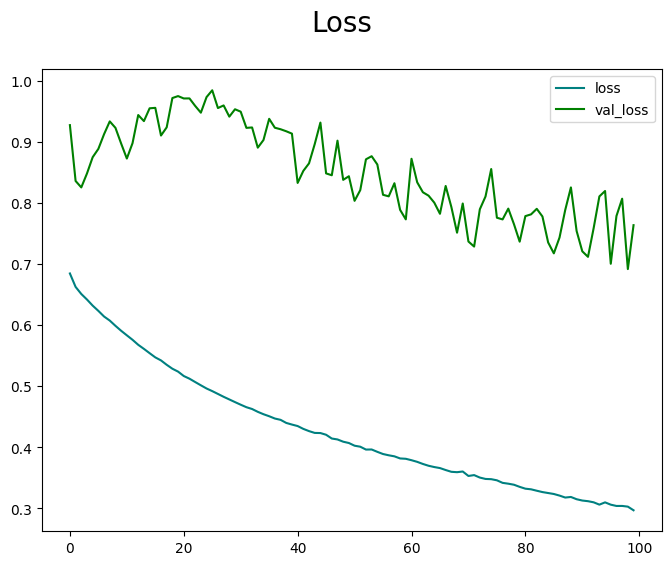

In [63]:
fig = plt.figure(figsize=(8,6))
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'],color = 'green',label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc='upper right')
plt.show()


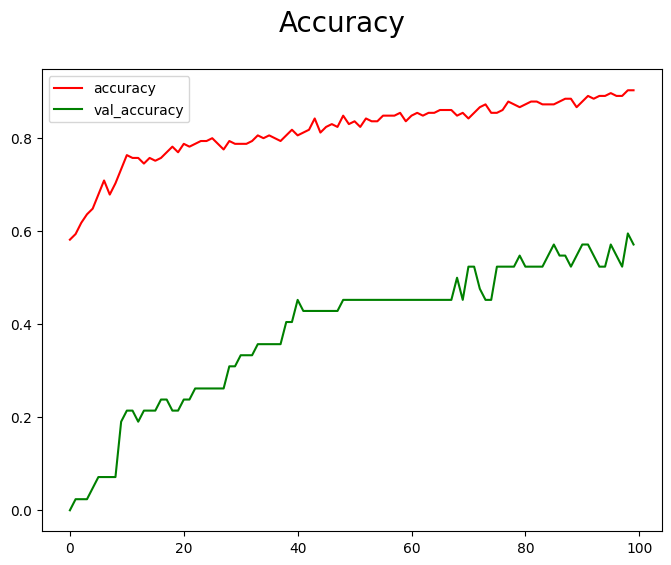

In [64]:
fig = plt.figure(figsize=(8,6))
plt.plot(hist.history['accuracy'],color='red',label='accuracy')
plt.plot(hist.history['val_accuracy'],color = 'green',label='val_accuracy')
fig.suptitle('Accuracy',fontsize=20)
plt.legend(loc='upper left')
plt.show()